## Capstone Project - Predictive Analysis on Early Detection of Heart Disease using Python and Machine Learning 

Problem Statement

Heart disease is a leading cause of mortality worldwide. Early detection and accurate prediction of heart disease can significantlyimprove patient outcomes by enabling timely intervention and preventive measures. The objective of this project is to develop a machine learning model that can effectively predict the presence or absence of heart disease based on various medical and lifestyle factors.

Research Objective:

The goal of this project is to build a predictive model that can
accurately classify individuals as either having or not having heart
disease. By analysing a comprehensive set of patient attributes,
including demographic, clinical and lifestyle factors, the model aims to identify patterns and features indicative of the presence or absence of heart disease.

Data Information

The dataset provided for this project is a subset of clinical data
worked on for a project with a healthcare organisation to understand the
influence of various factors on the heart disease.

About the Data

Age | Objective Feature | age | int (days)
Height | Objective Feature | height | int (cm) |
Weight | Objective Feature | weight | float (kg) |
Gender | Objective Feature | gender | 1: Female, 2: Male |
Systolic blood pressure | Examination Feature | ap_hi | int |
Diastolic blood pressure | Examination Feature | ap_lo | int |
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
Smoking | Subjective Feature | smoke | binary |
Alcohol intake | Subjective Feature | alco | binary |
Physical activity | Subjective Feature | active | binary |
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |
All of the dataset values were collected at the moment of medical examination.

## Loading the required librabries

In [1]:
# Importing the initial required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore the warnings that may appear
import warnings
warnings.filterwarnings("ignore")

# Importing the sklearn modules to be used
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy

# We will import the ML classification algorithms when required in this notebook.

## Import the Data

In [2]:
# Load in the data
df = pd.read_csv('cardio_data.csv')
df.head()

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,3/5/2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,5/8/2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,13/11/2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,31/10/2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,25/9/2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70000 non-null  object 
 1   country      70000 non-null  object 
 2   id           70000 non-null  int64  
 3   active       70000 non-null  int64  
 4   age          70000 non-null  int64  
 5   alco         70000 non-null  int64  
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gender       70000 non-null  int64  
 10  gluc         70000 non-null  int64  
 11  height       70000 non-null  int64  
 12  occupation   70000 non-null  object 
 13  smoke        70000 non-null  int64  
 14  weight       70000 non-null  float64
 15  disease      70000 non-null  int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 8.5+ MB


## Data Exploration & Cleaning

Remove duplicate data

In [4]:
df = df.drop_duplicates()       #no duplicates record
print(df.shape )

(70000, 16)


Check for empty data cells, remove rows (if any).

In [5]:
print(df.isnull().sum())

date           0
country        0
id             0
active         0
age            0
alco           0
ap_hi          0
ap_lo          0
cholesterol    0
gender         0
gluc           0
height         0
occupation     0
smoke          0
weight         0
disease        0
dtype: int64


change column 'age' data from days to years

In [6]:
# Convert the 'age' column from days to years as int

df['age'] = (df['age'] / 365).astype(int)


In [7]:
# Convert the 'weight' column as int

df['weight'] = (df['weight']).astype(int)

In [8]:
df.sample(5)

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
43762,21/12/2021,Malaysia,62532,1,55,0,150,90,1,1,1,165,Architect,0,68,1
58559,19/10/2021,Indonesia,83563,1,52,1,120,80,1,2,3,175,Teacher,0,81,1
32588,27/6/2021,Malaysia,46535,1,41,0,120,80,1,1,1,160,Others,0,99,1
4708,26/10/2020,Indonesia,6668,1,63,0,120,80,1,1,1,162,Doctor,0,65,0
4152,14/2/2018,India,5869,1,60,0,120,80,1,1,1,164,Nurse,0,68,0


check data set after cleaning

In [9]:
df.info()
print("\n")

#Determine the disease and healthy split
print("Total Positive records:", df['disease'].value_counts().iloc[1])
print("Total Negative records:", df['disease'].value_counts().iloc[0])
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         70000 non-null  object
 1   country      70000 non-null  object
 2   id           70000 non-null  int64 
 3   active       70000 non-null  int64 
 4   age          70000 non-null  int32 
 5   alco         70000 non-null  int64 
 6   ap_hi        70000 non-null  int64 
 7   ap_lo        70000 non-null  int64 
 8   cholesterol  70000 non-null  int64 
 9   gender       70000 non-null  int64 
 10  gluc         70000 non-null  int64 
 11  height       70000 non-null  int64 
 12  occupation   70000 non-null  object
 13  smoke        70000 non-null  int64 
 14  weight       70000 non-null  int32 
 15  disease      70000 non-null  int64 
dtypes: int32(2), int64(11), object(3)
memory usage: 8.0+ MB


Total Positive records: 34979
Total Negative records: 35021


,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
67709,18/8/2018,Singapore,96685,1,43,0,110,80,1,2,1,172,Teacher,0,95,0
53322,18/3/2021,Indonesia,76085,0,47,0,120,70,1,1,1,160,Others,0,68,0
9586,14/1/2019,India,13665,1,54,0,120,80,2,1,1,165,Accountant,0,79,1
43643,14/1/2021,India,62357,0,58,0,140,90,1,1,1,165,Engineer,0,71,1
63070,9/9/2020,Singapore,90063,1,52,0,110,80,2,1,1,160,Architect,0,70,0


In [10]:
df.describe()

,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight,disease
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,0.803729,52.840671,0.053771,128.817286,96.630414,1.366871,1.349571,1.226457,164.359229,0.088129,74.204329,0.499700
std,28851.302323,0.397179,6.766774,0.225568,154.011419,188.472530,0.680250,0.476838,0.572270,8.210126,0.283484,14.395953,0.500003
min,0.000000,0.000000,29.000000,0.000000,-150.000000,-70.000000,1.000000,1.000000,1.000000,55.000000,0.000000,10.000000,0.000000
25%,25006.750000,1.000000,48.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,159.000000,0.000000,65.000000,0.000000
50%,50001.500000,1.000000,53.000000,0.000000,120.000000,80.000000,1.000000,1.000000,1.000000,165.000000,0.000000,72.000000,0.000000
75%,74889.250000,1.000000,58.000000,0.000000,140.000000,90.000000,2.000000,2.000000,1.000000,170.000000,0.000000,82.000000,1.000000
max,99999.000000,1.000000,64.000000,1.000000,16020.000000,11000.000000,3.000000,2.000000,3.000000,250.000000,1.000000,200.000000,1.000000


Observations from basic exploration:

There are total 70000 records/rows and 16 columns in the dataset.
All independent variables have int values.
The disease column which is the target, has Total Positive records: 34979, Total Negative records: 35021
There is no missing value in any row/column. Hence, no need to treat the missing values.

## Visual analysis (EDA - Exploratory Data Analysis)

In [11]:
#data transformation, removing outliers, and other findings

df['disease'].value_counts(normalize=True) #to balance the target variable

df['bmi'] = df['weight'] / (df['height']/100)**2 #include the BMI variable
df['bmi'] = (df['bmi']).astype(int)

df.drop('id', axis=1, inplace=True) #id column is not vital for modeling
df.drop('date', axis=1, inplace=True) #date column is not vital for modeling
df.drop('country', axis=1, inplace=True) #country column is not vital for modeling
df.drop('occupation', axis=1, inplace=True) #occupation column is not vital for modeling

df.describe()
df.info()
len(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   active       70000 non-null  int64
 1   age          70000 non-null  int32
 2   alco         70000 non-null  int64
 3   ap_hi        70000 non-null  int64
 4   ap_lo        70000 non-null  int64
 5   cholesterol  70000 non-null  int64
 6   gender       70000 non-null  int64
 7   gluc         70000 non-null  int64
 8   height       70000 non-null  int64
 9   smoke        70000 non-null  int64
 10  weight       70000 non-null  int32
 11  disease      70000 non-null  int64
 12  bmi          70000 non-null  int32
dtypes: int32(3), int64(10)
memory usage: 6.1 MB


70000

In [12]:
#Check and address any Outliers

df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True) #remove outliers => remove heights that fall below 2.5% or above 97.5% of a given range
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True) #remove outliers => remove weights that fall below 2.5% or above 97.5% of a given range
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True) #remove outliers => remove systolic blood pressure values that fall below 2.5% or above 97.5% of a given range
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True) #remove outliers => remove diastolic blood pressure values that fall below 2.5% or above 97.5% of a given range
len(df)

60144

## Correlation analysis

In [13]:
df.corr()

,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight,disease,bmi
active,1.000000,-0.012204,0.025625,0.003032,0.000871,0.007849,0.007056,-0.007109,-0.005348,0.026653,-0.011876,-0.038545,-0.009380
age,-0.012204,1.000000,-0.028192,0.203735,0.146281,0.151778,-0.024787,0.096232,-0.082475,-0.047325,0.063309,0.237283,0.106042
alco,0.025625,-0.028192,1.000000,0.023612,0.026039,0.025573,0.167372,0.003657,0.087951,0.342300,0.057428,-0.014668,0.010585
ap_hi,0.003032,0.203735,0.023612,1.000000,0.695676,0.187134,0.044087,0.082742,-0.011072,0.020730,0.231192,0.428549,0.233253
ap_lo,0.000871,0.146281,0.026039,0.695676,1.000000,0.146811,0.048922,0.061274,0.007324,0.018296,0.210874,0.321561,0.203576
cholesterol,0.007849,0.151778,0.025573,0.187134,0.146811,1.000000,-0.042013,0.454086,-0.069343,0.004565,0.129362,0.216656,0.163915
gender,0.007056,-0.024787,0.167372,0.044087,0.048922,-0.042013,1.000000,-0.023871,0.501663,0.336773,0.128776,-0.004853,-0.138507
gluc,-0.007109,0.096232,0.003657,0.082742,0.061274,0.454086,-0.023871,1.000000,-0.030206,-0.009960,0.087498,0.085865,0.101693
height,-0.005348,-0.082475,0.087951,-0.011072,0.007324,-0.069343,0.501663,-0.030206,1.000000,0.184867,0.248311,-0.030790,-0.277555
smoke,0.026653,-0.047325,0.342300,0.020730,0.018296,0.004565,0.336773,-0.009960,0.184867,1.000000,0.055643,-0.023473,-0.042026


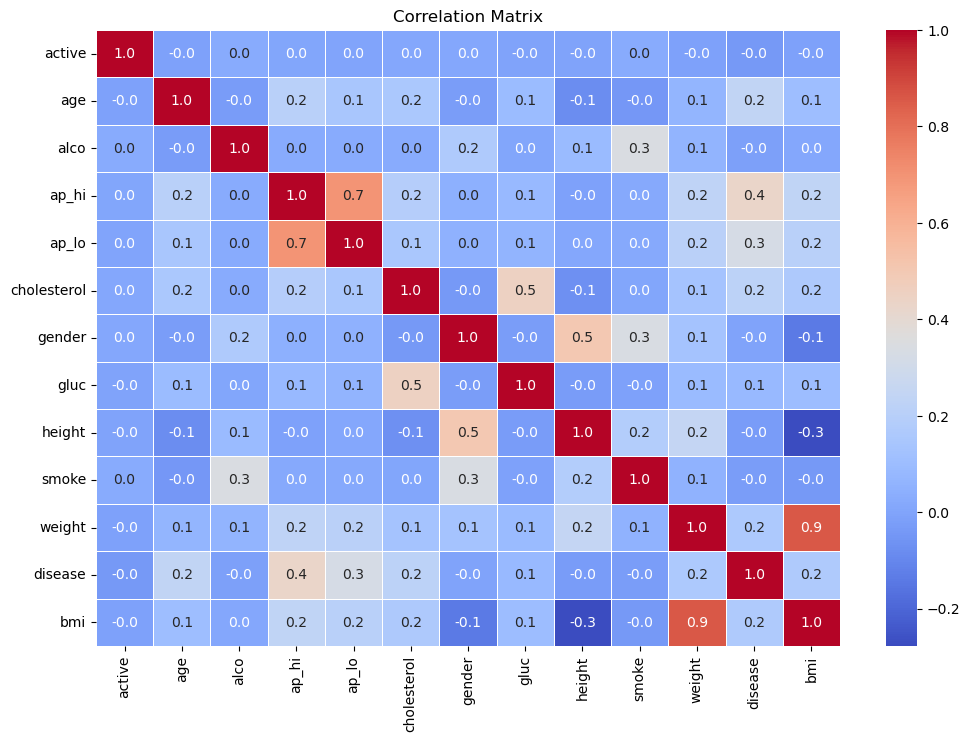

In [14]:
#Correlation Matrix

correlation_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", linewidth=.5, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Training Models

In [15]:
# Importing the function/module to randomly split the data

from sklearn.model_selection import train_test_split

In [16]:
# Selecting the predictors and target

X = df.drop('disease',axis = 1)  # taking all columns as input except Variety column
Y = df['disease']                # taking only Variety column as the target

In [17]:
# Verifying the features and target variables

display(X.head())
display(Y.head())

,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,smoke,weight,bmi
0,1,50,0,110,80,1,2,1,168,0,62,21
1,1,55,0,140,90,3,1,1,156,0,85,34
2,0,51,0,130,70,3,1,1,165,0,64,23
3,1,48,0,150,100,1,2,1,169,0,82,28
4,0,47,0,100,60,1,1,1,156,0,56,23


0    0
1    1
2    1
3    1
4    0
Name: disease, dtype: int64

In [18]:
# Split the data into train and test
# the attribute test_size=0.25 splits the data into 75% and 25% ratio. train=75% and test=25%
# We have set the reproduceability using random_state
 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

# in this our main data is split into train and test

print("Train Shape",X_train.shape)
print("Test Shape",X_test.shape)

Train Shape (45108, 12)
Test Shape (15036, 12)


Verify Train Test split with Target Value

In [19]:
# Printing the total counts of unique values in the Y_train

print(Y_train.value_counts())

# Let's divide these values by 45108 (total rows in training data) to get percentage.
(Y_train.value_counts()/45108)*100        # Multiply with 100 to get percentage


disease
0    23081
1    22027
Name: count, dtype: int64


disease
0    51.168307
1    48.831693
Name: count, dtype: float64

In [20]:
# Printing the total counts of unique values in the Y_test

print(Y_test.value_counts())

# Let's divide these values by 15036 (total rows in testing data) to get percentage.
(Y_test.value_counts() / 15036) * 100   # Multiply with 100 to get percentage


disease
0    7698
1    7338
Name: count, dtype: int64


disease
0    51.197127
1    48.802873
Name: count, dtype: float64

In [21]:
display(df['disease'].value_counts())

disease
0    30779
1    29365
Name: count, dtype: int64

the data split is acceptable, Our data splits are now ready to go throught the models.

## Data Modeling

In [22]:
# Importing the algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


## Logistic Regression Classification

In [23]:
# instantiating and training the model on training dataset, 
# and making predictions for the testing data

log = LogisticRegression()

log.fit(X_train,Y_train)

logPrediction = log.predict(X_test)

logAccuracy = metrics.accuracy_score(logPrediction,Y_test)

print("The accuracy of logistic regression is:", logAccuracy*100, "%")

The accuracy of logistic regression is: 72.18675179569034 %


## k-Nearest Neighbor (k-NN) Classification

In [24]:
# we will take 3 neighbors to find a majority. Default is 5.

knn=KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,Y_train)

KNNprediction=knn.predict(X_test)

knnAccuracy = metrics.accuracy_score(KNNprediction,Y_test)

print("The accuracy of KNN model is:", knnAccuracy*100, "%")

The accuracy of KNN model is: 66.27427507315775 %


## Support Vector Machine

In [25]:
svc=SVC()   # SVC stands for Support Vector Classifier

svc.fit(X_train,Y_train) 

svcPrediction=svc.predict(X_test)

svcAccuracy = metrics.accuracy_score(svcPrediction,Y_test)

print("The accuracy of SVM model is:", svcAccuracy*100, "%")

The accuracy of SVM model is: 71.38201649374834 %


## Decision Tree Classifier

In [26]:
tree= DecisionTreeClassifier()

tree.fit(X_train,Y_train)

treePrediction=tree.predict(X_test)

treeAccuracy = metrics.accuracy_score(treePrediction,Y_test)

print("The accuracy of Decision Tree model is:", treeAccuracy*100, "%")

The accuracy of Decision Tree model is: 63.0220803405161 %


## Model Performance Evaluation

In [27]:
print("The accuracy of logistic regression is:", logAccuracy*100, "%")
print("The accuracy of KNN model is:", knnAccuracy*100, "%")
print("The accuracy of SVM model is:", svcAccuracy*100, "%")
print("The accuracy of Decision Tree model is:", treeAccuracy*100, "%")

The accuracy of logistic regression is: 72.18675179569034 %
The accuracy of KNN model is: 66.27427507315775 %
The accuracy of SVM model is: 71.38201649374834 %
The accuracy of Decision Tree model is: 63.0220803405161 %


Based on accuracy of the model, it looks like Logistic Regression and SVM model can be used.

Accuracy score is a reliable performance metric if the data is balanced. In our case too, the data is balanced so we can conclude that for the type of analysis we have done on the type of data, logistic regression, KNN classifier or SVM classifier - all three are suitable model.

## Confusion Matrix and Classification Report

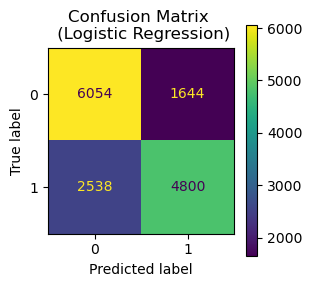

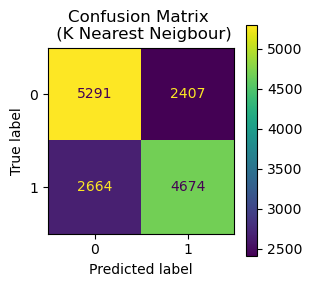

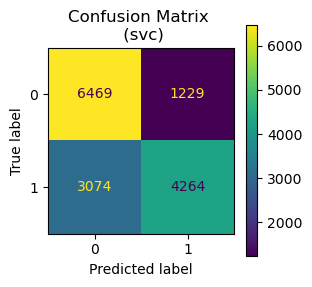

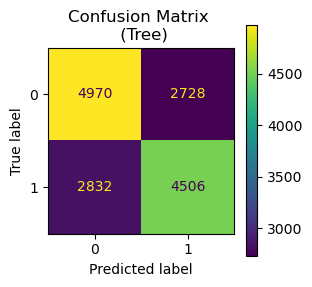

In [34]:
#Confusion Matrix

logistic_regression_confusion_matrix = confusion_matrix(Y_test, logPrediction)
cmd_LR=ConfusionMatrixDisplay(logistic_regression_confusion_matrix, display_labels = [0,1])
fig, ax = plt.subplots(figsize=(3,3))
plt.title('Confusion Matrix \n (Logistic Regression)')
cmd_LR.plot(ax=ax)

k_nearest_neigbour_confusion_matrix = confusion_matrix(Y_test, KNNprediction)
cmd_KNN=ConfusionMatrixDisplay(k_nearest_neigbour_confusion_matrix, display_labels = [0,1])
fig, ax = plt.subplots(figsize=(3,3))
plt.title('Confusion Matrix \n (K Nearest Neigbour)')
cmd_KNN.plot(ax=ax)

svc_confusion_matrix = confusion_matrix(Y_test, svcPrediction)
cmd_svc=ConfusionMatrixDisplay(svc_confusion_matrix, display_labels = [0,1])
fig, ax = plt.subplots(figsize=(3,3))
plt.title('Confusion Matrix \n (svc)')
cmd_svc.plot(ax=ax)

tree_confusion_matrix = confusion_matrix(Y_test, treePrediction)
cmd_tree=ConfusionMatrixDisplay(tree_confusion_matrix, display_labels = [0,1])
fig, ax = plt.subplots(figsize=(3,3))
plt.title('Confusion Matrix \n (Tree)')
cmd_tree.plot(ax=ax)


In [29]:
# Display Classification Report
print("\n")
print("Logistic Regression Classification Report")
LR_classification_report = classification_report(Y_test,logPrediction)
print(LR_classification_report)

print("\n")
print("KNN Classification Report")
KNN_classification_report = classification_report(Y_test,KNNprediction)
print(KNN_classification_report)

print("\n")
print("SVC Classification Report")
SVC_classification_report = classification_report(Y_test,svcPrediction)
print(SVC_classification_report)

print("\n")
print("Decision Tree Classification Report")
tree_classification_report = classification_report(Y_test,treePrediction)
print(tree_classification_report)



Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      7698
           1       0.74      0.65      0.70      7338

    accuracy                           0.72     15036
   macro avg       0.72      0.72      0.72     15036
weighted avg       0.72      0.72      0.72     15036



KNN Classification Report
              precision    recall  f1-score   support

           0       0.67      0.69      0.68      7698
           1       0.66      0.64      0.65      7338

    accuracy                           0.66     15036
   macro avg       0.66      0.66      0.66     15036
weighted avg       0.66      0.66      0.66     15036



SVC Classification Report
              precision    recall  f1-score   support

           0       0.68      0.84      0.75      7698
           1       0.78      0.58      0.66      7338

    accuracy                           0.71     15036
   macro avg       0.73     

The model performance shows accuracy scores ranging from approximately 62% to 72% for all four models, with the highest score achieved by Logistic Regression. However, since our goal is to capture all positive cases in this scenario, we should prioritize the Recall score when selecting a model for prediction. According to the Recall score, Logistic Regression performs the best with an accuracy of 65%.